# Importing Data

In [43]:
import pandas as pd

In [199]:
score_card=pd.read_csv("Scorecard.csv")
info_card=pd.read_csv("Infocard_.csv")

In [200]:
info_card.head()

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,363,225245,England,Pakistan,male,8/30/2006,2006,NatWest Series,1.0,Sophia Gardens,...,BR Doctrove,IJ Gould,PJ Hartley,MR Benson,MJ Procter,NaN,NaN,NaN,NaN,no result
1,364,225246,England,Pakistan,male,9/2/2006,2006,NatWest Series,2.0,Lord's,...,MR Benson,BR Doctrove,IJ Gould,NJ Llong,MJ Procter,Pakistan,NaN,7.0,D/L,NaN
2,365,225247,England,Pakistan,male,9/5/2006,2006,NatWest Series,3.0,The Rose Bowl,...,BR Doctrove,NJ Llong,IJ Gould,PJ Hartley,MJ Procter,Pakistan,NaN,2.0,NaN,NaN
3,366,225248,England,Pakistan,male,9/8/2006,2006,NatWest Series,4.0,Trent Bridge,...,MR Benson,DJ Harper,NJ Llong,IJ Gould,MJ Procter,England,NaN,8.0,NaN,NaN
4,367,225249,England,Pakistan,male,9/10/2006,2006,NatWest Series,5.0,Edgbaston,...,IJ Gould,DJ Harper,PJ Hartley,NJ Llong,MJ Procter,England,NaN,3.0,NaN,NaN


In [201]:
score_card.head()

,Match_id,Innings,Player_name,Batting_number,Over_start_number,Runs_Scored,Balls_faced,Dots,Ones,Twos,...,FOW_over,FOW_batting_number,FOW_bowler,Wicket_method,Overs_bowled,Runs_conceded,Wickets_taken,Maiden_overs,Extras,co-batsmen wicket fallen
0,1000887,1,DA Warner,1,0.1,7,18,15,3,0,...,4.3,1,Mohammad Amir,bowled,0.0,0,0,0,0,0
1,1000887,1,TM Head,2,0.1,39,39,19,13,1,...,12.6,4,Imad Wasim,caught,10.0,30,0,0,2,2
2,1000887,1,SPD Smith,3,4.4,0,1,1,0,0,...,4.4,2,Mohammad Amir,caught,0.0,0,0,0,0,-1
3,1000887,1,CA Lynn,4,4.5,16,12,8,3,0,...,9.2,3,Hasan Ali,caught,0.0,0,0,0,0,-1
4,1000887,1,MR Marsh,5,9.3,4,17,13,4,0,...,16.2,5,Imad Wasim,caught,6.0,27,1,0,0,0


# Formulation for data preprocessing

# 1. Weighted Average

In [202]:
def wei_avg_bats(data_score):
    all_players=((data_score["Player_name"]))
    data=[]
    n=len(data_score['Player_name'])
    for i in all_players:
        score=0
        for j in range(0,n):
            if(i==data_score["Player_name"][j]):
                score+=data_score["Runs_Scored"][j]
        data.append([i,score])
    all_players=(set(data_score["Player_name"]))
    batt_num=[]
    sum=0
    n=len(data_score['Player_name'])
    for i in all_players:
        score=0
        for j in range(0,n):
            if(i==data_score["Player_name"][j] and data_score["FOW_batting_number"][j] > -1 ):
                score+=1
        batt_num.append([i,score])
        sum=sum+score
    average=[]
    for i,j in enumerate(data):
        average.append([j[0],data[i][1]/batt_num[i][1]])
    all_players=((data_score["Player_name"]))
    ball_faced=[]
    n=len(data_score['Player_name'])
    sum_balls=0
    for i in all_players:
        score=0
        for j in range(0,n):
            if(i==data_score["Player_name"][j]):
                score+=data_score["Balls_faced"][j]
        ball_faced.append([i,score])
        sum_balls+=score
    strike=[]
    for i,j in enumerate(data):
        strike.append([j[0],(j[1]/ball_faced[i][1])*100])
    weighted_average=[]
    for i in range(0,len(strike)):
        weight=((data[i][1]*33.33)+(ball_faced[i][1]*33.33)+(strike[i][1]*33.33))/100
        weighted_average.append([data[i][0],weight])
    return (weighted_average)


# 2. Co-batsman Runs

In [204]:
def co_batsman(player_name_list,runs_scored):
    all_players=(player_name_list)
    data=[]
    n=len(player_name_list)
    for i,j in enumerate(all_players):
        score=0
        score=runs_scored[i]
        data.append([j,score])
    total_runs=sum(runs_scored)
    runs1=[]
    for i in range(0,len(data)):
        runs1.append(data[i][1])
    co_bats=[]
    for i in runs1:
        co_bats.append(total_runs-i)
    for i in range(0,len(data)):
        data[i].append(co_bats[i])
    return (co_bats)
    

# 3. Co-batsman Average

In [205]:
def co_batsman_avg(player_name_list,fow_batting):
    batt_num=[]
    sum=0
    n=len(player_name_list)
    wicket_fallen=[0]*(n)
    for i in range(0,len(fow_batting)):
        if(fow_batting[i]>-1):
            wicket_fallen[i]=1
            sum+=wicket_fallen[i]
    for i in range(0,len(wicket_fallen)):
        wicket_fallen[i]=sum-wicket_fallen[i]
    score=[]
    for i,j in enumerate(wicket_fallen):
        score.append(int(player_name_list[i]/j))
    return (score)
    

# 4. Co-batsman Strike Rate

In [206]:
def co_batsman_strike(player_name,ball_face,co_bat_score):
    all_players=player_name
    ball_faced=[]
    n=len(player_name)
    sum_balls=0
    score=0
    for i,j in enumerate(all_players):
        score+=ball_face[i]
        ball_faced.append([j,score])
        sum_balls+=score
    ball_face=[]
    for i in ball_faced:
        ball_face.append(sum_balls-i[1])
    final_ball_faced=[]
    for i,j in enumerate(co_bat_score):
        final_ball_faced.append(int(j/ball_face[i])*100)
    return(final_ball_faced)
    

# 5. Team Average

In [207]:
def team_average(data_score):
    match_ids=list(set(data_score["Match_id"]))
    team_average=[]
    for i in sorted(match_ids):
        id=i
        one_inn=0
        two_inn=0
        one_wicket_fall=1
        two_wicket_fall=1
        for x,j in enumerate(data_score["Match_id"]):
            if(i==j):
                if(data_score["Innings"][x]==1):
                    one_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>one_wicket_fall):
                        one_wicket_fall=data_score["FOW_batting_number"][x]
                else:
                    two_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>two_wicket_fall):
                        two_wicket_fall=data_score["FOW_batting_number"][x]
        team_average.append([id,(one_inn/one_wicket_fall),(two_inn/two_wicket_fall)])  
    plt_list=[]
    for i,j in enumerate(data_score["Player_name"]):
        temp_play=[]
        score=0
        lenght=0
        for x,player_search in enumerate(data_score["Player_name"]):
            if(j==player_search):
                if(j not in temp_play):
                    temp_play.append(j)
                match_id=data_score["Match_id"][x]
                inn=data_score["Innings"][x]
                for c in team_average:
                    if(c[0]==match_id ):
                        score+=c[inn]
                        lenght+=1
        plt_list.append([temp_play,score/lenght])
    play=[]
    avg=[]
    for i in plt_list:
        for j in (i[0]):
            play.append(j)
    for i in plt_list:
        avg.append(i[1])
    tem_avg=[]
    for i in range(0,len(play)):
        tem_avg.append(avg[i])
    return(tem_avg)

# 6. Team Strike Rate

In [208]:
def team_strike_rate(data_score):
    team_strike=[]
    for i in (data_score["Match_id"]):
        id=i
        one_inn=0
        two_inn=0
        one_wicket_fall=1
        two_wicket_fall=1
        one_balls=1
        two_balls=1
        for x,j in enumerate(data_score["Match_id"]):
            if(i==j):
                if(data_score["Innings"][x]==1):
                    one_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>one_wicket_fall):
                        one_wicket_fall=data_score["FOW_batting_number"][x]
                    one_balls+=data_score["Balls_faced"][x]
                else:
                    two_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>two_wicket_fall):
                        two_wicket_fall=data_score["FOW_batting_number"][x]
                    two_balls+=data_score["Balls_faced"][x]
        team_strike.append([id,(one_inn/one_balls)*100,(two_inn/two_balls)*100])  
    str_rate_list=[]
    str1=[]
    for i,j in enumerate(data_score["Player_name"]):
        temp_play=[]
        score=0
        lenght=0
        for x,player_search in enumerate(data_score["Player_name"]):
            if(j==player_search):
                if(j not in temp_play):
                    temp_play.append(j)
                match_id=data_score["Match_id"][x]
                inn=data_score["Innings"][x]
                for c in team_strike:
                    if(c[0]==match_id ):
                        score+=c[inn]
                        lenght+=1  
        str_rate_list.append([temp_play,score/lenght])
        str1.append(score/lenght)
    return str1

# 7. Team Win-Lose

In [209]:
def team_wl(data_score,infocard):
    win_data=[]
    for i,j in enumerate(infocard["Match_id"]):
        team_id=j
        one_win=0
        if(infocard["Winner"][i]==infocard["Team1"][i]):
            one_win=1
        elif(infocard["Winner"][i]==infocard["Team2"][i]):
            one_win=2
        else:
            one_win=3
        win_data.append([team_id,one_win])
    match_win=[]
    for i,j in enumerate(data_score["Player_name"]):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in win_data:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            lose+=1
                        else:
                            win+=1
        match_win.append([player,win,lose,tie])    
    decision=[]
    for i,j in enumerate(infocard["Toss_decision"]):
        if(info_card["Toss_decision"][i]=='bat'):
            decision.append([infocard["Match_id"][i],1])
        else:
            decision.append([infocard["Match_id"][i],2])
    for i in range(0,len(decision)):
        if(str(infocard["Winner"][i])=="nan"):
            decision[i][1]=3
        elif(str(infocard["Toss_winner"][i])!=str(infocard["Winner"][i])):
            if(decision[i][1]==1):
                decision[i][1]=2
            else:
                decision[i][1]=1
    match_win=[]
    for i,j in enumerate(data_score["Player_name"]):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in decision:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            lose+=1
                        else:
                            win+=1
        match_win.append([player,win,lose,tie])          
    win_los=[]
    total_match=[]
    for i in match_win:
        win_los.append(i[1]+i[2])
        total_match.append(i[1]+i[2]+i[3])
    final_win_lose=[]
    for i,j in enumerate(match_win):
        if(j[2]==0):
            fo1= j[1]/1
        else:
            fo1= j[1]/j[2]
        final_win_lose.append(fo1)
    return (final_win_lose)

# 8. Opposite Team Average

In [56]:
def opp_team_average(data_score):
    one_in_wicket=0
    two_in_wicket=0
    for i in range(0,len(data_score["Runs_Scored"])):
        if(data_score["Innings"][i]==1):
            if(data_score["FOW_batting_number"][i] > -1):
                one_in_wicket+=1
        else:
            if(data_score["FOW_batting_number"][i] > -1):
                two_in_wicket+=1
    final=[]
    for i in range(0,len(data_score["Runs_Scored"])):
        if(data_score["Innings"][i]==1):
            a=data_score["Runs_Scored"][i]/two_in_wicket
        else:
            a=data_score["Runs_Scored"][i]/one_in_wicket
        if(str(a)=='inf'):
            a=0
        final.append(int(a))
    return(final)
    
        

# 9. Opposite Team Strike

In [210]:
def oppo_team_strike(data_score):
    team_strike=[]
    match_ids=list(set(data_score["Match_id"]))
    for i in (match_ids):
        id=i
        one_inn=0
        two_inn=0
        one_wicket_fall=1
        two_wicket_fall=1
        one_balls=1
        two_balls=1
        for x,j in enumerate(data_score["Match_id"]):
            if(i==j):
                if(data_score["Innings"][x]==1):
                    one_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>one_wicket_fall):
                        one_wicket_fall=data_score["FOW_batting_number"][x]
                    one_balls+=data_score["Balls_faced"][x]
                else:
                    two_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>two_wicket_fall):
                        two_wicket_fall=data_score["FOW_batting_number"][x]
                    two_balls+=data_score["Balls_faced"][x]
        team_strike.append([id,(one_inn/one_balls)*100,(two_inn/two_balls)*100])  
    opp_str_rate_list=[]
    for i,j in enumerate(data_score["Player_name"]):
        temp_play=[]
        score=0
        lenght=0
        for x,player_search in enumerate(data_score["Player_name"]):
            if(j==player_search):
                if(j not in temp_play):
                    temp_play.append(j)
                match_id=data_score["Match_id"][x]
                inn=data_score["Innings"][x]
                for c in team_strike:
                    if(c[0]==match_id ):
                        if(inn==2):
                            score+=c[inn-1]
                            lenght+=1
                        elif(inn==1):
                            score+=c[inn+1]
                            lenght+=1
        opp_str_rate_list.append(int(score/lenght))
    return (opp_str_rate_list)
    

# 10. Opposite Team Win-Lose

In [211]:
def oppo_team_wl(data_score,infocard):
    all_players=(set(data_score["Player_name"]))
    win_data=[]
    for i,j in enumerate(infocard["Match_id"]):
        team_id=j
        one_win=0
        if(infocard["Winner"][i]==infocard["Team1"][i]):
            one_win=1
        elif(infocard["Winner"][i]==infocard["Team2"][i]):
            one_win=2
        else:
            one_win=3
        win_data.append([team_id,one_win])
    match_win=[]
    for i,j in enumerate(all_players):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in win_data:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            win+=1
                        else:
                            lose+=1
        match_win.append([player,win,lose,tie])               
    decision=[]
    for i,j in enumerate(infocard["Toss_decision"]):
        if(infocard["Toss_decision"][i]=='bat'):
            decision.append([infocard["Match_id"][i],1])
        else:
            decision.append([infocard["Match_id"][i],2])
    for i in range(0,len(decision)):
        if(str(infocard["Winner"][i])=="nan"):
            decision[i][1]=3
        elif(str(infocard["Toss_winner"][i])!=str(infocard["Winner"][i])):
            if(decision[i][1]==1):
                decision[i][1]=2
            else:
                decision[i][1]=1
    match_win=[]
    for i,j in enumerate(all_players):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in decision:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            lose+=1
                        else:
                            win+=1
        match_win.append([player,win,lose,tie])               
    win_los=[]
    total_match=[]
    for i in match_win:
        win_los.append(i[1]+i[2])
        total_match.append(i[1]+i[2]+i[3])
    op_final_win_lose=[]
    for i,j in enumerate(match_win):
        if(j[2]==0):
            fo1= j[1]/1
        else:
            fo1= j[1]/j[2]
        op_final_win_lose.append(fo1)
    return(op_final_win_lose)

# Data Preprocessing

In [212]:
def rising(l1,l2,l3,l4,l5,l6,l7,l8,l9):
    re=[]
    for i in range(0,len(l1)):
        dd=0
        if(l1==None):
            dd+=0
        else:
            dd+=l1[i]
        if(l2==None):
            dd+=0
        else:
            dd+=l2[i]
        if(l3==None):
            dd+=0
        else:
            dd+=l3[i]
        if(l4==None):
            dd+=0
        else:
            dd+=l4[i]
        if(l5==None):
            dd+=0
        else:
            dd+=l5[i]
        if(l6==None):
            dd+=0
        else:
            dd+=l6[i]
        if(l7==None):
            dd+=0
        else:
            dd-=l7[i]
        if(l8==None):
            dd+=0
        else:
            dd-=l8[i]
        if(l9==None):
            dd+=0
        else:
            dd-=l9[i]
        re.append(dd)
    return re

In [60]:
def master(matchid,score_card):
    temp=matchid
    players=[]
    runs=[]
    fow_batting=[]
    ball_faced=[]
    match_id=[]
    inig=[]
    runs_conceded=[]
    over_bowled=[]
    wicket_taken=[]
    wicket_fall=[]
    for x,y in enumerate(score_card["Match_id"]):

        if(temp==y):
            inig.append(score_card["Innings"][x])
            match_id.append(score_card["Match_id"][x])
            players.append(score_card["Player_name"][x])
            runs.append(score_card["Runs_Scored"][x])
            fow_batting.append(score_card["FOW_batting_number"][x])
            ball_faced.append(score_card["Balls_faced"][x])
            runs_conceded.append(score_card["Runs_conceded"][x])
            over_bowled.append(score_card["Overs_bowled"][x])
            wicket_taken.append(score_card["Wickets_taken"][x])
            wicket_fall.append(score_card["FOW_batting_number"][x])

    dataframe=pd.DataFrame({"Match_id":match_id,"Innings":inig,"Player_name":players,"Runs_Scored":runs,"FOW_batting_number":fow_batting,"Balls_faced":ball_faced,"Runs_conceded":runs_conceded,"Overs_bowled":over_bowled,"Wickets_taken":wicket_taken})
#     print(inig,match_id)
#     print(temp)
#     print(runs)
#     print(wicket_fall)
#     print("------------")
    if(len(runs)==0 or len(wicket_fall)==0):
        s=0
    else:
        if(len(wicket_fall)>20):
            first_inn_score=sum(runs[:12])
            second_inn_score=sum(runs[12:])
            wicketfal_one=max(wicket_fall[:12])
            wicketfal_two=max(wicket_fall[12:])
#             print(temp)
#             print("first_inn_score  ",first_inn_score)
#             print("second_inn_score ",second_inn_score)
#             print("wicketfal_one    ",wicketfal_one)
#             print("wicketfal_two    ",wicketfal_two)
#             print("Weighted Average Batsman")

            rs_1=co_batsman(players,runs)
#             print(len(rs_1),rs_1)
            rs_2=co_batsman_avg(runs,fow_batting)
#             print(len(rs_2),rs_2)
            rs_3=co_batsman_strike(players,ball_faced,rs_1)
#             print(rs_3)
            rs_4=team_average(dataframe)
#             print(rs_4)
            rs_5=team_strike_rate(dataframe)
#             print(rs_5)
            rs_6=team_wl(dataframe,info_card)
#             print(rs_6)
            rs_7=opp_team_average(dataframe)
#             print(rs_7)
            rs_8=oppo_team_strike(dataframe)
#             print(rs_8)
            rs_9=oppo_team_wl(dataframe,info_card)
#             print(rs_9)
            
            rising_star=rising(rs_1,rs_2,rs_3,rs_4,rs_5,rs_6,rs_7,rs_8,rs_9)
            rrr=(wei_avg_bats(dataframe))
            
            for i in range(0,len(rrr)):
                rrr[i].append(rising_star[i])
            
            return rrr
            

In [ ]:
# Unique_year

Uniq_year=list(set(info_card["Season"]))
series=list(set(info_card["Series/Competition"]))


In [ ]:
for i in Uniq_year:
    print(i)
    for x,y in enumerate(info_card["Season"]):
        if(i==y):
            print(i,info_card["Series/Competition"][x])
            
    

In [62]:
masters=[]
for i in series:
    temp=[]
    for x,y in enumerate(info_card["Series/Competition"]):
        if(i==y):
            temp.append(info_card["Match_id"][x])
    masters.append([i,temp])

In [63]:
series=[]
id=[]
players=[]
for i in masters:
    print("On the way")
    ids=[]
    ser=[]
    player=[]
    for j in i[1]:
        
        ids.append(j)
        ser.append(i[0])
        try:
            player.append(master(j,score_card))
        except:
            pass
    
    series.append(ser)
    id.append(ids)
    players.append(player)
    
print("All Done")

On the way
On the way
On the way


C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in longlong_scalars
C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in longlong_scalars


On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way


C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in longlong_scalars


On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way

In [64]:
for i in range(0,len(players)):
    for x,y in enumerate(players[i]):
#         if(players[i][x]!=None):
#             print(players[i][x][0])
        if(players[i][x]!=None):
            for g in range(0,len(players[i][x])):
                players[i][x][g].append(id[i][x])

In [66]:
master_series=[]
master_id=[]
master_player=[]
for u,w in enumerate(series):
#     print(len(w),len(id[u]),len(players[u]))
    normal=[]
    values=[]
    values_rs=[]
    id_s=[]
    for i in players[u]:
        if(i!=None):
            for j in i:
                normal.append(j[0])
                id_s.append(j[3])
                values_rs.append(j[2])
                if(str(j[1])=='nan'):
                    values.append(0)
                else:
                    values.append(float(j[1]))
    uniq_normal=set(normal)
    final=[]
    for i,j in enumerate(uniq_normal):
        val=0
        val_rs=0
        idf=[]
        for x,y in enumerate(normal):
            if(j==y):
                val+=values[x]
                val_rs+=values_rs[x]
                idf.append(id_s[x])

        final.append([j,val,val_rs,idf])
#     master_series.append(j)
#     master_id.append(p for p in id[u])
#     master_player.append(b for b in final)
    for i in range(0,len(final)):
        master_player.append(final[i])
        master_series.append(w[0])
        master_id.append(id[u])

In [214]:
# for i in range(0,len(master_player)):
#     print(master_series[i],master_player[i])

In [215]:
seri=[]
play=[]
wei_av=[]
rs=[]
i_d=[]
for i in range(len(master_player)):
#     print(master_player[i])
    seri.append(master_series[i])
    play.append(master_player[i][0])

    wei_av.append((master_player[i][1]))
    
    rs.append(int(master_player[i][2]))
    i_d.append(master_player[i][3])

In [216]:
final_data=pd.DataFrame({"Series":seri,"Player":play,"Weighted Average":wei_av,"Rising star":rs,"ID Playes":i_d})

# Final Data

In [218]:
final_data

,Series,Player,Weighted Average,Rising star,ID Playes
0,England in Bangladesh ODI Series,Nasir Hossain,69.326400,985,"[1029821, 1029823]"
1,England in Bangladesh ODI Series,AU Rashid,50.909637,1599,"[1029819, 1029821, 1029823]"
2,England in Bangladesh ODI Series,Taskin Ahmed,9.999000,1615,"[1029819, 1029821, 1029823]"
3,England in Bangladesh ODI Series,JJ Roy,93.125607,994,"[1029819, 1029821]"
4,England in Bangladesh ODI Series,Sabbir Rahman,144.589195,1541,"[1029819, 1029821, 1029823]"
...,...,...,...,...,...
7281,West Indies Women in Australia ODI Series,RM Farrell,45.226246,954,"[754809, 754811]"
7282,West Indies Women in Australia ODI Series,DJS Dottin,132.467955,1250,"[754809, 754811, 754815]"
7283,West Indies Women in Australia ODI Series,NE Bolton,199.008467,1223,"[754809, 754811, 754815]"
7284,West Indies Women in Australia ODI Series,HK Matthews,216.698262,1115,"[754809, 754811, 754815]"


In [126]:
# Data export
GFG = pd.ExcelWriter('finaldata.xlsx') 
final_data.to_excel(GFG, index = False) 
  
GFG.save() 

In [244]:
final_data1=pd.read_csv("finaldata.csv")
final_data1.head()

,Series,Player,Weighted Average,Rising star,ID Playes
0,England in Bangladesh ODI Series,Nasir Hossain,69.326400,985,"[1029821, 1029823]"
1,England in Bangladesh ODI Series,AU Rashid,50.909637,1599,"[1029819, 1029821, 1029823]"
2,England in Bangladesh ODI Series,Taskin Ahmed,9.999000,1615,"[1029819, 1029821, 1029823]"
3,England in Bangladesh ODI Series,JJ Roy,93.125607,994,"[1029819, 1029821]"
4,England in Bangladesh ODI Series,Sabbir Rahman,144.589195,1541,"[1029819, 1029821, 1029823]"


# Machine Learning - Clustring

In [219]:
# Through this project we are offering the users to get the best players from the given input series.

In [290]:
seri=str(input())         # Eg. India in England ODI Series, West Indies Women in Australia ODI Series
weight=[]
rise=[]
player=[]

for i in range(0,len(final_data["Weighted Average"])):
    if(final_data["Series"][i]==seri):
        weight.append(final_data["Weighted Average"][i])
        rise.append(final_data["Rising star"][i])
        player.append(final_data["Player"][i])
        
      
series=[]
for i in range(0,len(weight)):
    series.append(i)

India in England ODI Series


In [291]:
import seaborn as sns

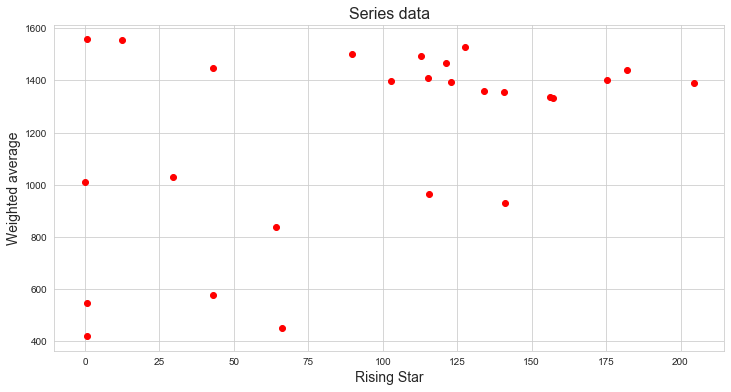

In [292]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(weight, rise, color="red")
plt.xlabel("Rising Star", fontsize=14)
plt.ylabel("Weighted average", fontsize=14)
plt.title("Series data", fontsize=16)
plt.show()

In [293]:
Batsmen=pd.DataFrame({"Weight":weight,"rise":rise,"tmp_id":series})

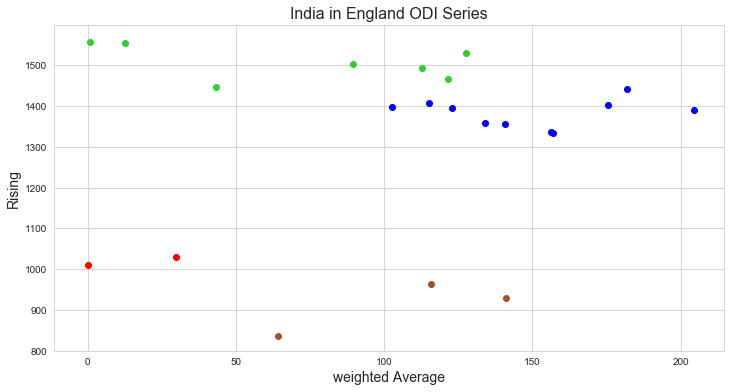

In [294]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(Batsmen[["Weight", "rise"]])
Batsmen["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "sienna", "limegreen", "red", "black"]

for r in range(1,6):
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Weight"], clustered_Batsmen["rise"], color=colors[r-1])
    
plt.title(seri, fontsize=16)
plt.xlabel("weighted Average", fontsize=14)
plt.ylabel("Rising", fontsize=14)
    
plt.show()

In [271]:
# Batsmen = Batsmen.rename(columns={"Player_names": "Player_Id"})
Batsmen = Batsmen.sort_values(by ='cluster' )
Batsmen.head()

,Weight,rise,tmp_id,cluster
0,64.221647,837,0,0
4,141.204326,930,4,0
10,115.711784,964,10,0
23,204.395282,1391,23,1
21,102.641151,1398,21,1


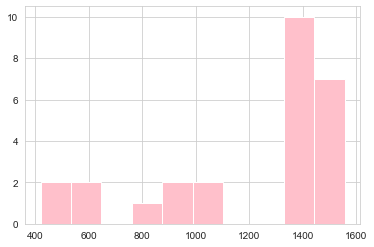

In [272]:
Batsmen["rise"].hist(color="pink")

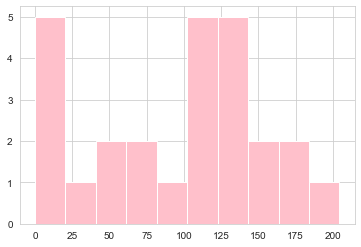

In [273]:
Batsmen["Weight"].hist(color="pink")

In [274]:
Players_batsmen = pd.DataFrame({"Player":player,"tmp_id":series})

Batsmen = Batsmen[Batsmen.columns].merge(Players_batsmen)
Batsmen.head(5)

,Weight,rise,tmp_id,cluster,Player
0,64.221647,837,0,0,IR Bell
1,141.204326,930,4,0,AT Rayudu
2,115.711784,964,10,0,MS Dhoni
3,204.395282,1391,23,1,SK Raina
4,102.641151,1398,21,1,EJG Morgan
